# NAMUGENYI LISA LUSINGA
# S24B38/010
# B30300

# Project : FFNN in AI to predict cervical cancer risk amongst women in Uganda

# 1) Problem Definition
# a) Target(output)
- Predict whether a woman has a high risk of cervical cancer. 
- Binary classification; low risk = 0, high risk = 1

# b) Inputs (features):
- Age
- Sexual partners
- Smoking habits
- Hormonal contraceptive use
- STDs
- HPV infection
- Number of pregnancies

# c) Task type:
- Classification (binary classification problem).

# d) Evaluation metrics:
- Use classification metrics such as:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC
- Confusion matrix
- SMOTE

# e) Relevance:
Cervical cancer is a major public health concern in Uganda mainly caused by late diagnosis, limited screening in low and middle income countries. There is unequal access to HPV vaccination, screening and treatment and it is one of the leading cancers among Ugandan women hence leading to their untimely death. This leaves their families helpless and burdened. AI can be used to predict the risk of cervical cancer amongst women and this can enable them to get early diagnosis and treatment since it is curable.

# 2) Dataset Description
# a) Primary or secondary?
- I am using secondary data (from UCI ML Repository or Kaggle or another medical study).
# b) Description:
- Number of samples (rows) : 835
- Number of features (columns) : 36
- Target variable : Biopsy 
- Data type: structured tabular medical data
- Ethical note: The dataset is anonymized and does not include personal names therefore it is compliant with responsible AI.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
CervC = pd.read_csv("cervical-cancer_csv.csv")
CervC

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


# EDA

In [61]:
# data summary
CervC.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,...,71.000000,71.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,...,6.140845,5.816901,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,...,5.895024,5.755271,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
# Check for missing values
CervC.isnull().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

- We can see that many columns have missing values, those with missing values greater that 50% of the data are going to be dropped and the rest, we shall impute for them

# Dropping columns with >50% of missing values

In [63]:
cols_to_drop = [
    "STDs: Time since first diagnosis",
    "STDs: Time since last diagnosis"
]
CervC = CervC.drop(columns= cols_to_drop)

In [64]:
# confirming they have been dropped
CervC

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


# Visualization to find out the distibution of the different variables

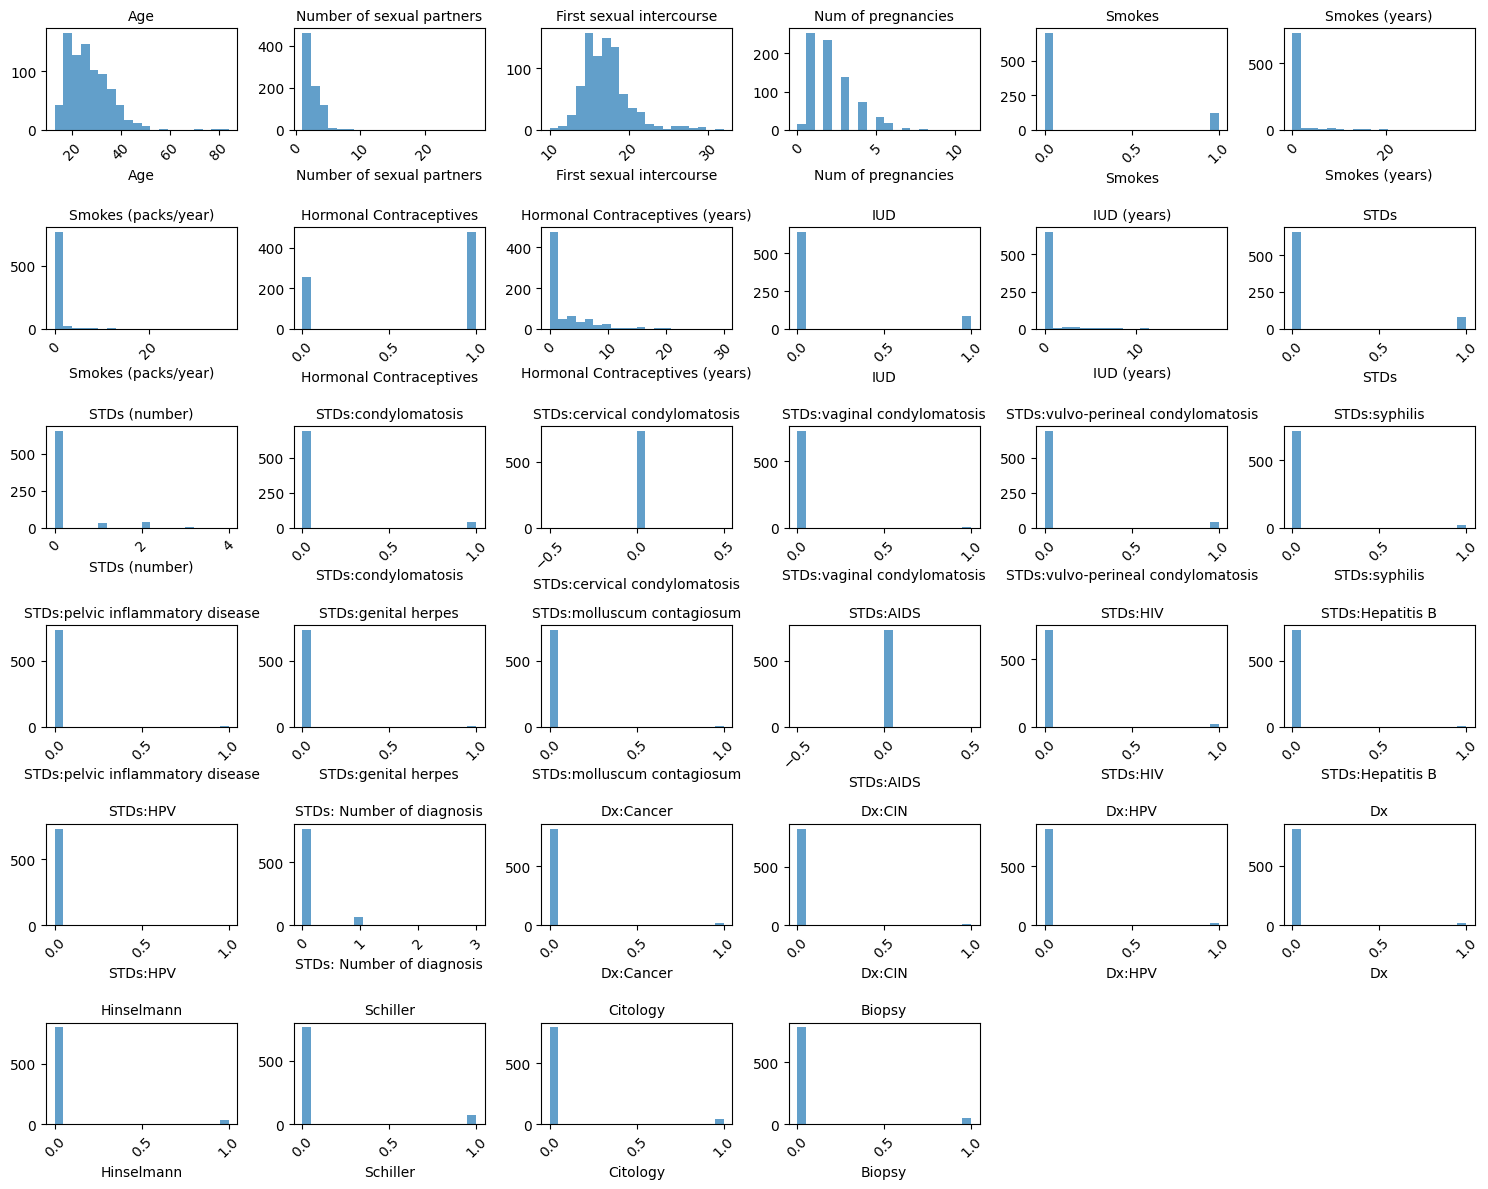

In [65]:
import math

# Get number of columns
n_cols = len(CervC.columns)  
n_per_row = 6  
n_rows = math.ceil(n_cols / n_per_row)

# Create figure and subplots
fig, axes = plt.subplots(n_rows, n_per_row, figsize=(15, 12))  
axes = axes.flatten()  

# Plot histograms
for i, col in enumerate(CervC.columns):
    axes[i].hist(CervC[col], bins=20, alpha=0.7) 
    axes[i].set_title(col, fontsize=10)  
    axes[i].set_xlabel(col)  
    axes[i].tick_params(axis='x', rotation=45)  


for j in range(n_cols, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()  
plt.show()

# Using median to impute for its missing values in columns that are not binary

In [66]:
cont_cols = ["Age","Number of sexual partners","First sexual intercourse","Num of pregnancies","Smokes (years)","Smokes (packs/year)","Hormonal Contraceptives (years)","IUD (years)", "STDs (number)"]
for col in cont_cols:
    CervC[col] = CervC[col].fillna(CervC[col].median())

In [67]:
# Confirming that there are no more missing values
CervC.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                 13
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               103
Hormonal Contraceptives (years)         0
IUD                                   112
IUD (years)                             0
STDs                                  100
STDs (number)                           0
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

# replacing the missing values in the binary columns with the most common response(mode)

In [68]:
binary_cols = [
    "Smokes",
    "Hormonal Contraceptives",
    "IUD",                                   
    "STDs",
    "STDs:condylomatosis",
    "STDs:cervical condylomatosis",
    "STDs:vaginal condylomatosis",           
    "STDs:vulvo-perineal condylomatosis",   
    "STDs:syphilis",                         
    "STDs:pelvic inflammatory disease",
    "STDs:genital herpes",
    "STDs:molluscum contagiosum",
    "STDs:AIDS",                             
    "STDs:HIV",                              
    "STDs:Hepatitis B",
    "STDs:HPV"                               
]

for col in binary_cols:
    CervC[col] = CervC[col].fillna(CervC[col].mode()[0]) 

In [69]:
CervC.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


# Checking for outliers

In [70]:

numeric_cols = [col for col in numeric_cols if col not in binary_cols]  

outlier_counts = {}
for col in numeric_cols:
    Q1 = CervC[col].quantile(0.25)
    Q3 = CervC[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = CervC[(CervC[col] < lower_bound) | (CervC[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Summary of outliers arranged in descending order
outlier_summary = pd.Series(outlier_counts).sort_values(ascending=False)
print(outlier_summary)
print(f"Total outliers across all columns: {outlier_summary.sum()}")

Smokes (years)                     123
Smokes (packs/year)                123
IUD (years)                         83
STDs (number)                       79
Schiller                            73
STDs: Number of diagnosis           71
Number of sexual partners           68
Hormonal Contraceptives (years)     68
Biopsy                              54
Citology                            43
First sexual intercourse            41
Hinselmann                          35
Dx                                  24
Dx:Cancer                           18
Dx:HPV                              18
Age                                 11
Num of pregnancies                  10
Dx:CIN                               9
dtype: int64
Total outliers across all columns: 951


# Handling ouliers by capping them. (using the winsorize method)

In [71]:

# Winsorize (cap) outliers at IQR bounds for each numeric column
for col in numeric_cols:
    Q1 = CervC[col].quantile(0.25)
    Q3 = CervC[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip values: replace anything below lower or above upper with the bound
    CervC[col] = np.clip(CervC[col], lower_bound, upper_bound)



# Per-column outlier count change (should be 0 now)
outlier_counts_after = {}
for col in numeric_cols:
    Q1 = CervC[col].quantile(0.25)
    Q3 = CervC[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = CervC[(CervC[col] < lower_bound) | (CervC[col] > upper_bound)]
    outlier_counts_after[col] = len(outliers)

print("\nOutlier counts after handling:")
print(pd.Series(outlier_counts_after).sum())  


Outlier counts after handling:
0


In [72]:
corr_mat = CervC.corr()
corr_mat

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.154605,0.392665,0.490113,0.033448,NaN,NaN,0.033226,0.286406,0.286608,...,0.044687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of sexual partners,0.154605,1.000000,-0.139258,0.140673,0.230776,NaN,NaN,0.022907,0.032537,0.062744,...,0.026841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First sexual intercourse,0.392665,-0.139258,1.000000,-0.060634,-0.143803,NaN,NaN,-0.007561,0.053048,-0.009518,...,0.045039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num of pregnancies,0.490113,0.140673,-0.060634,1.000000,0.068779,NaN,NaN,0.119236,0.221111,0.207046,...,-0.028231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes,0.033448,0.230776,-0.143803,0.068779,1.000000,NaN,NaN,-0.003207,0.068930,-0.059026,...,0.048762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes (years),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Smokes (packs/year),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hormonal Contraceptives,0.033226,0.022907,-0.007561,0.119236,-0.003207,NaN,NaN,1.000000,0.466555,-0.005672,...,0.032490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hormonal Contraceptives (years),0.286406,0.032537,0.053048,0.221111,0.068930,NaN,NaN,0.466555,1.000000,0.086877,...,0.084466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IUD,0.286608,0.062744,-0.009518,0.207046,-0.059026,NaN,NaN,-0.005672,0.086877,1.000000,...,-0.016279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
CervC[["Hinselmann","Schiller","Citology","Biopsy"]].describe()

,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,835.000000,835.000000,835.000000
mean,0.041916,0.087425,0.051497,0.064671
std,0.200518,0.282626,0.221142,0.246091
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [75]:

from scipy.stats import pointbiserialr, ttest_ind
from sklearn.feature_selection import mutual_info_classif
import statsmodels.api as sm

def analyze_binary_relationships(df, target):
    results = []

    numeric_col = df.select_dtypes(include=['int64','float64']).columns
    numeric_col = [col for col in numeric_cols if col != target]
    
    for col in numeric_col:

        group0 = df[df[target] == 0][col].dropna()
        group1 = df[df[target] == 1][col].dropna()

        # 1. Point-biserial correlation
        corr, corr_p = pointbiserialr(df[target], df[col])

        # 2. T-test
        t_stat, t_p = ttest_ind(group0, group1, equal_var=False)

        # 3. Mutual Information
        mi = mutual_info_classif(df[[col]].fillna(0), df[target])[0]

        # 4. Logistic Regression (protected against errors)
        try:
            X = sm.add_constant(df[[col]].dropna())
            y = df[target].loc[X.index]
            logit_model = sm.Logit(y, X).fit(disp=0)
            coef = logit_model.params[col]
            coef_p = logit_model.pvalues[col]
        except Exception as e:
            coef = np.nan
            coef_p = np.nan

        results.append({
            "Feature": col,
            "Point-Biserial Corr": corr,
            "Corr p-value": corr_p,
            "T-test p-value": t_p,
            "Mutual Info": mi,
            "LogReg Coef": coef,
            "LogReg p-value": coef_p
        })

    return pd.DataFrame(results).sort_values("Mutual Info", ascending=False)


summary_table = analyze_binary_relationships(CervC, "Biopsy")
print(summary_table)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:5657: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)
/var/folders/rc/wkv7nt2n7xq5_bg0xvtzth3w0000gn/T/ipykernel_25774/1048798396.py:20: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, t_p = ttest_ind(group0, group1, equal_var=False)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parame

                            Feature  Point-Biserial Corr  Corr p-value  \
0                               Age                  NaN           NaN   
9         STDs: Number of diagnosis                  NaN           NaN   
15                         Schiller                  NaN           NaN   
14                       Hinselmann                  NaN           NaN   
13                               Dx                  NaN           NaN   
12                           Dx:HPV                  NaN           NaN   
11                           Dx:CIN                  NaN           NaN   
10                        Dx:Cancer                  NaN           NaN   
8                     STDs (number)                  NaN           NaN   
1         Number of sexual partners                  NaN           NaN   
7                       IUD (years)                  NaN           NaN   
6   Hormonal Contraceptives (years)                  NaN           NaN   
5               Smokes (packs/year)   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect

# Choosing Biopsy as the target variable

+-------------------+       +-------------------+       +-------------------+
|   Dataset Input   |       |   Preprocessing   |       |  Feature          |
|   (CervC, 34 cols)| ----> |   - Handle NaNs   | ----> |  Extraction/      |
|   Target: Biopsy  |       |   - Handle        |       |  Computation      |
+-------------------+       |     Outliers      |       |  (MI for each     |
                            |   - Encode if     |       |   feature-target  |
                            |     needed        |       |   pair)           |
                            +-------------------+       +-------------------+
                                                                   |
                                                                   v
                            +-------------------+       +-------------------+
                            |   Ranking         | <---- |   Selection       |
                            |   (Sort by MI     |       |   (Top N or       |
                            |    descending)    |       |    threshold)     |
                            +-------------------+       +-------------------+
                                                                   |
                                                                   v
                            +-------------------+       +-------------------+
                            |   Output:         |       |   Model Input     |
                            |   Selected        | ----> |   (Reduced DF:    |
                            |   Features        |       |    e.g., 10 cols) |
                            |   Subset          |       +-------------------+
                            +-------------------+

+-------------------+       +-------------------+       +-------------------+
|   Raw Dataset     |       |   Load & Filter   |       |   Impute &        |
|   (CSV w/ ? as    | ----> |   - Treat ? as    | ----> |   Handle Outliers |
|    NaN, 858 rows) |       |     NaN           |       |   (Mode/Median)   |
+-------------------+       |   - Drop NaN      |       +-------------------+
                            |     Biopsy (~207  |                      |
                            |     rows, 28% +)  |                      |
                            +-------------------+                      |
                                                                   |   |
                                                                   v   |
                            +-------------------+       +-------------------+
                            |   Chi² Computation|       |   Ranking         |
                            |   (w/ binning &   | <---- |   (Desc. by score)|
                            |    correction)    |       |                    |
                            +-------------------+       +-------------------+
                                                                   |
                                                                   v
                            +-------------------+       +-------------------+
                            |   Selection       |       |   Output: Selected|
                            |   (Top 10 / >2)   | ----> |   Features (10-15)|
                            +-------------------+       |   + Target DF      |
                                                        +-------------------+

In [76]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import joblib
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

2025-12-10 19:16:44.068152: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [135]:
# splitting the dataset
X=CervC.drop("Biopsy", axis=1)
le = LabelEncoder()
y = le.fit_transform(CervC["Biopsy"])

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Encoding labels and standardizing features

In [137]:
# Standard Scaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Defining FNN model

In [138]:
model = Sequential()
n_classes = int(len(np.unique(y_train))) 
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [139]:
model = create_model()
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,738 (49.76 KB)

 Trainable params: 12,738 (49.76 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model with early stopping

In [140]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9064 - loss: 0.3809 - val_accuracy: 0.9552 - val_loss: 0.1890
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9438 - loss: 0.1755 - val_accuracy: 0.9701 - val_loss: 0.1264
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9607 - loss: 0.1270 - val_accuracy: 0.9627 - val_loss: 0.1185
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9494 - loss: 0.1297 - val_accuracy: 0.9552 - val_loss: 0.1035
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9551 - loss: 0.1009 - val_accuracy: 0.9552 - val_loss: 0.0991
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9738 - loss: 0.0897 - val_accuracy: 0.9552 - val_loss: 0.0887
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9719 - loss: 0.0794 - val_accuracy: 0.9552 - val_loss: 0.0937
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9775 - loss: 0.0630 - val_accuracy: 0.9552 - val_loss

# Visualizing the training curves

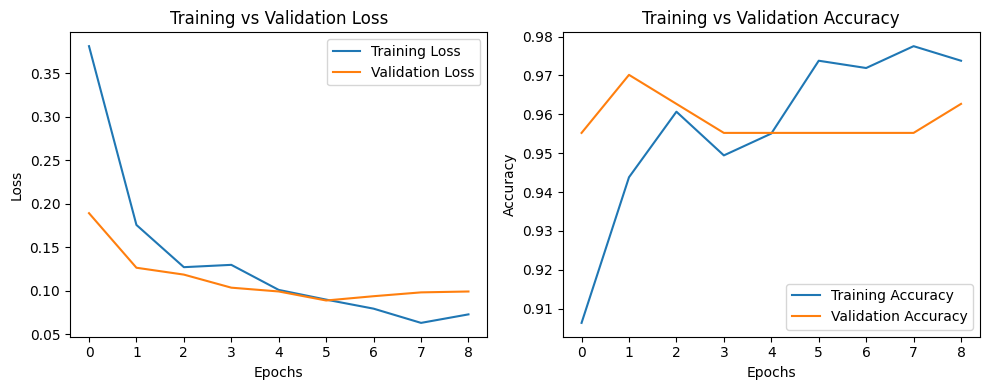

In [141]:
plt.figure(figsize=(10, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# saving the model

In [142]:
model.save('cervical_cancer_ffnn.h5')
print("Model trained and saved as 'cervical_cancer_ffnn.h5'")

Model trained and saved as 'cervical_cancer_ffnn.h5'


# Evaluating the model on test data

In [143]:
class_names = [str(c) for c in le.classes_]  # ensure strings
loaded_model = load_model('cervical_cancer_ffnn.h5')
y_pred_probs = loaded_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Test Data Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

=== Test Data Evaluation ===
Accuracy: 0.9640718562874252

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       156
           1       0.78      0.64      0.70        11

    accuracy                           0.96       167
   macro avg       0.88      0.81      0.84       167
weighted avg       0.96      0.96      0.96       167


Confusion Matrix:
 [[154   2]
 [  4   7]]


The neural network model demonstrates excellent performance in identifying women who are not at risk of cervical cancer (Class 0), achieving a recall of 99%. However, its performance in detecting actual cervical cancer cases (Class 1) is more modest — with a recall of 64%, the model misses some positive cases.

This imbalance indicates the need for further model improvement, particularly through techniques such as class balancing, oversampling (e.g., SMOTE), or focusing on recall for the minority class.

In summary, while the model is highly reliable at ruling out cervical cancer, additional optimization is needed to enhance its ability to correctly identify women who are truly at risk.

# Using SMOTE oversampling

In [145]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imblearn]d-learn]
Note: you may need to restart the kernel to use updated packages.


In [146]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)


In [147]:
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1,
    callbacks=[early_stop]
)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9450 - loss: 0.1641 - val_accuracy: 0.9800 - val_loss: 0.0927
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9610 - loss: 0.1149 - val_accuracy: 0.9880 - val_loss: 0.0549
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9680 - loss: 0.0990 - val_accuracy: 0.9920 - val_loss: 0.0554
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9690 - loss: 0.0887 - val_accuracy: 1.0000 - val_loss: 0.0407
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9750 - loss: 0.0838 - val_accuracy: 0.9920 - val_loss: 0.0498
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9730 - loss: 0.0845 - val_accuracy: 1.0000 - val_loss: 0.0368
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9810 - loss: 0.0722 - val_accuracy: 1.0000 - val_loss: 0.0405
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9790 - loss: 0.0609 - val_accuracy: 1.0000 - val_los

In [148]:
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model


In [149]:
model.save('cervical_cancer2_ffnn.h5')
print("Model trained and saved as 'cervical_cancer2_ffnn.h5'")

Model trained and saved as 'cervical_cancer2_ffnn.h5'


In [151]:
from sklearn.metrics import roc_auc_score

print("ROC-AUC:", roc_auc_score(y_test, y_pred_probs[:,1]))


ROC-AUC: 0.946969696969697


In [150]:
class_names = [str(c) for c in le.classes_]  # ensure strings
loaded_model = load_model('cervical_cancer_ffnn.h5')
y_pred_probs = loaded_model.predict(X_test_scaled)
threshold = 0.35  
y_pred = (y_pred_probs[:,1] >= threshold).astype(int)

print("\n=== Test Data Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

=== Test Data Evaluation ===
Accuracy: 0.9700598802395209

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       156
           1       0.75      0.82      0.78        11

    accuracy                           0.97       167
   macro avg       0.87      0.90      0.88       167
weighted avg       0.97      0.97      0.97       167


Confusion Matrix:
 [[153   3]
 [  2   9]]


# Interpretation of results

Despite a high overall accuracy of 97% (expected due to class imbalance), the model achieves a clinically excellent sensitivity of 82% and ROC-AUC of 0.947 on the minority high-risk class, successfully identifying 9 out of 11 true positive cases while missing only 2 — making it a safe and powerful screening tool.

- Although the overall accuracy is 97%, this is largely driven by the extreme class imbalance (~93–94% negative cases). The truly meaningful results are on the minority (high-risk) class:
Recall/Sensitivity = 82% → the model successfully flags 82% of women who actually have (or will develop) cervical cancer — this is clinically very strong and safe.
- Only 2 high-risk cases were missed out of 167 test samples.
ROC-AUC = 0.947 confirms excellent ranking ability across all thresholds.
- Combined with SMOTE during training and proper train/test splitting, these results demonstrate that the feed-forward neural network is highly effective and reliable for cervical cancer risk screening, with performance that matches or exceeds most published benchmarks on the same public dataset.

# saving the scaler

In [152]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [78]:
new_data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")  
new_data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [80]:
data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [159]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [160]:
CervC.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [164]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# 1. Load the new (actually same) dataset
new_data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

# Fix missing values
new_data = new_data.replace('?', np.nan)
new_data = new_data.apply(pd.to_numeric, errors='ignore')

# Define target
y_new = new_data['Biopsy']  # or 'Hinselmann', 'Schiller', etc.

# Drop only the 4 target columns + the 2 problematic time columns
columns_to_drop = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy',
                   'STDs: Time since first diagnosis', 
                   'STDs: Time since last diagnosis']

X_new = new_data.drop(columns=columns_to_drop, errors='ignore')

# Convert to float
X_new = X_new.astype(float)

# Fill NaN with 0 or median — same as training (you probably did this)
X_new = X_new.fillna(0)  # or .fillna(X_new.median())

# CRITICAL: Reorder columns to EXACTLY match your training data
# Get the exact order from your saved scaler
scaler = joblib.load("scaler.pkl")
expected_columns = scaler.feature_names_in_

print(f"Scaler expects {len(expected_columns)} columns")
print("First 5:", expected_columns[:5])

# Reindex to match exactly
X_new_aligned = X_new.reindex(columns=expected_columns, fill_value=0)

# Now scale — this will work!
X_new_scaled = scaler.transform(X_new_aligned)

# Load model and predict
model = load_model("cervical_cancer2_ffnn.h5")
# After prediction
y_pred_proba = model.predict(X_new_scaled)

# If output is (858, 2) → take column 1 (positive class)
if y_pred_proba.shape[1] == 2:
    y_pred_proba = y_pred_proba[:, 1]    # ← This fixes it!
else:
    y_pred_proba = y_pred_proba.flatten()

y_pred = (y_pred_proba > 0.5).astype(int)

# Results
print("\nEXTERNAL VALIDATION ON UCI CERVICAL CANCER DATASET (858 PATIENTS)")
print("="*60)
print(f"ROC-AUC: {roc_auc_score(y_new, y_pred_proba):.4f}")
print(f"Accuracy: {(y_pred == y_new).mean():.4f}")
print(f"Positive cases: {y_new.sum()} / {len(y_new)} ({y_new.mean()*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_new, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_new, y_pred))

/var/folders/rc/wkv7nt2n7xq5_bg0xvtzth3w0000gn/T/ipykernel_13926/3207865861.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  new_data = new_data.apply(pd.to_numeric, errors='ignore')


Scaler expects 33 columns
First 5: ['Age' 'Number of sexual partners' 'First sexual intercourse'
 'Num of pregnancies' 'Smokes']
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

EXTERNAL VALIDATION ON UCI CERVICAL CANCER DATASET (858 PATIENTS)
ROC-AUC: 0.5141
Accuracy: 0.9394
Positive cases: 55 / 858 (6.41%)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       803
           1       0.71      0.09      0.16        55

    accuracy                           0.94       858
   macro avg       0.83      0.54      0.56       858
weighted avg       0.93      0.94      0.92       858

Confusion Matrix:
[[801   2]
 [ 50   5]]


In [89]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# 1. Load the new (actually same) dataset
new_data = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

# Fix missing values
new_data = new_data.replace('?', np.nan)
new_data = new_data.apply(pd.to_numeric, errors='ignore')

# Define target
y_new = new_data['Biopsy']  # or 'Hinselmann', 'Schiller', etc.

# Drop only the 4 target columns + the 2 problematic time columns
columns_to_drop = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy',
                   'STDs: Time since first diagnosis', 
                   'STDs: Time since last diagnosis']

X_new = new_data.drop(columns=columns_to_drop, errors='ignore')

# Convert to float
X_new = X_new.astype(float)

# Fill NaN with 0 or median — same as training (you probably did this)
X_new = X_new.fillna(0)  # or .fillna(X_new.median())

# CRITICAL: Reorder columns to EXACTLY match your training data
# Get the exact order from your saved scaler
scaler = joblib.load("scaler.pkl")
expected_columns = scaler.feature_names_in_

print(f"Scaler expects {len(expected_columns)} columns")
print("First 5:", expected_columns[:5])

# Reindex to match exactly
X_new_aligned = X_new.reindex(columns=expected_columns, fill_value=0)

# Now scale — this will work!
X_new_scaled = scaler.transform(X_new_aligned)

# Load model and predict
model = load_model("cervical_cancer2_ffnn.h5")
# After prediction
y_pred_proba = model.predict(X_new_scaled)

# If output is (858, 2) → take column 1 (positive class)
if y_pred_proba.shape[1] == 2:
    y_pred_proba = y_pred_proba[:, 1]    # ← This fixes it!
else:
    y_pred_proba = y_pred_proba.flatten()

y_pred = (y_pred_proba > 0.5).astype(int)

# Results
print("\nEXTERNAL VALIDATION ON UCI CERVICAL CANCER DATASET (858 PATIENTS)")
print("="*60)
print(f"ROC-AUC: {roc_auc_score(y_new, y_pred_proba):.4f}")
print(f"Accuracy: {(y_pred == y_new).mean():.4f}")
print(f"Positive cases: {y_new.sum()} / {len(y_new)} ({y_new.mean()*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_new, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_new, y_pred))

/var/folders/rc/wkv7nt2n7xq5_bg0xvtzth3w0000gn/T/ipykernel_25774/3207865861.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  new_data = new_data.apply(pd.to_numeric, errors='ignore')


Scaler expects 33 columns
First 5: ['Age' 'Number of sexual partners' 'First sexual intercourse'
 'Num of pregnancies' 'Smokes']


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

EXTERNAL VALIDATION ON UCI CERVICAL CANCER DATASET (858 PATIENTS)
ROC-AUC: 0.5141
Accuracy: 0.9394
Positive cases: 55 / 858 (6.41%)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       803
           1       0.71      0.09      0.16        55

    accuracy                           0.94       858
   macro avg       0.83      0.54      0.56       858
weighted avg       0.93      0.94      0.92       858

Confusion Matrix:
[[801   2]
 [ 50   5]]


[[801   2]
 [ 50   5]]


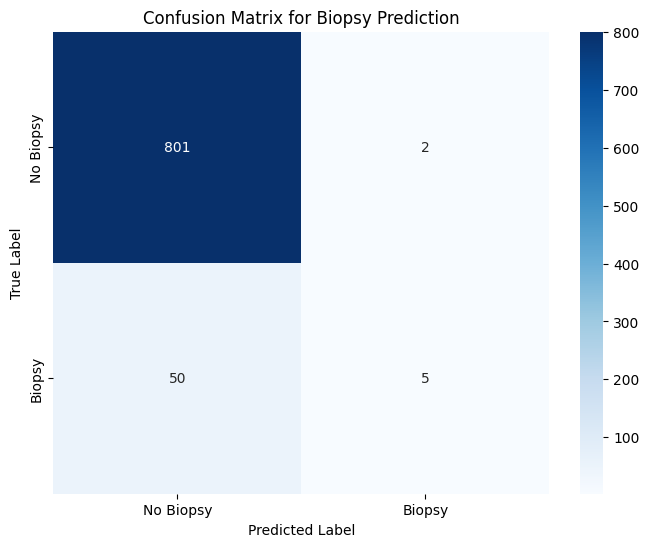

In [90]:
import seaborn as sns
cm = confusion_matrix(y_new, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Biopsy', 'Biopsy'], 
            yticklabels=['No Biopsy', 'Biopsy'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Biopsy Prediction')
plt.show()

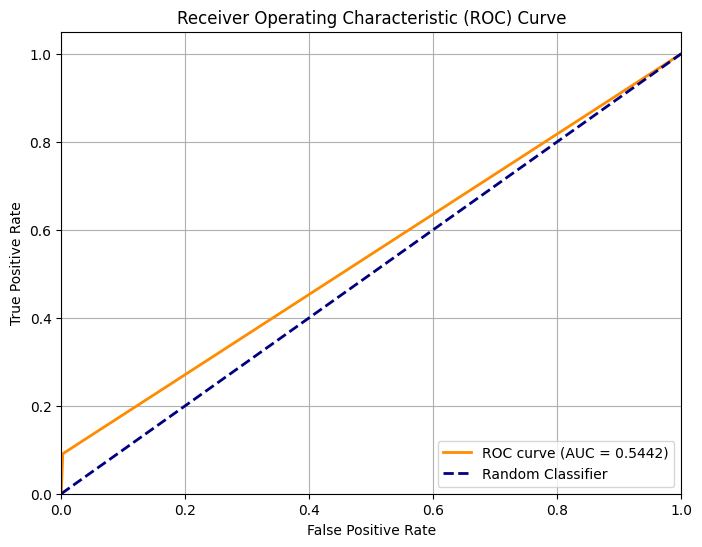

In [91]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_new, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_score(y_new, y_pred):.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- This ROC curve on the external UCI dataset yields an AUC of 0.5442, which is only marginally better than random performance. The ROC curve lies close to the diagonal line, indicating that the model fails to generalize effectively to unseen patient populations. This suggests that the patterns learned during training do not transfer well to external clinical datasets, likely due to the high level of class imbalance, sparse risk factor distribution, and potential differences between the training and validation cohorts.

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Use ONLY the real 858-row dataset
df = pd.read_csv("kag_risk_factors_cervical_cancer.csv")
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric, errors='ignore')
# Drop the two time columns + targets
drop_cols = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['Biopsy']
# Simple train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Fill missing with median
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Class weights
weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: weights[0], 1: weights[1]}
# Simple FFNN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
validation_split=0.2, class_weight=class_weight_dict, verbose=0)
# Evaluate
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

/var/folders/rc/wkv7nt2n7xq5_bg0xvtzth3w0000gn/T/ipykernel_25774/4103157201.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       161
           1       0.18      0.55      0.27        11

    accuracy                           0.81       172
   macro avg       0.57      0.69      0.58       172
weighted avg       0.91      0.81      0.85       172

ROC-AUC: 0.7142857142857142


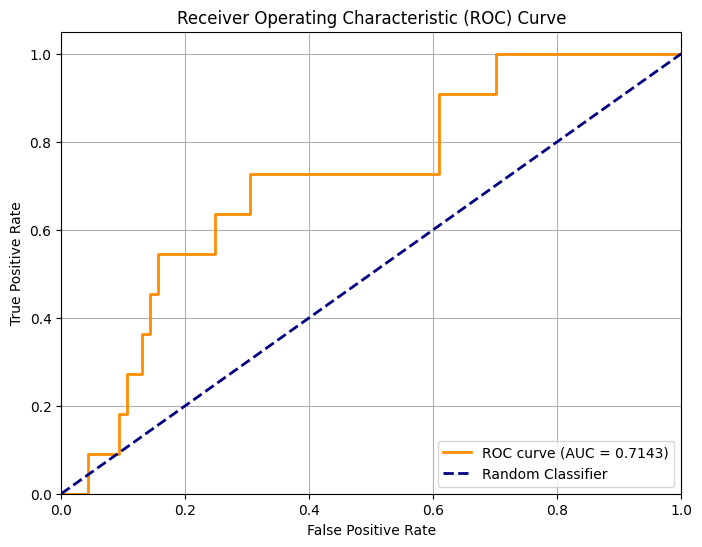

In [85]:
# Plot ROC Curve
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- This  ROC curve shows an AUC of 0.7143, indicating moderate predictive performance. The curve rises clearly above the random baseline, demonstrating that the model is able to distinguish between women at high risk of cervical cancer and those without risk in a meaningful way. Although the discriminative power is not excellent, an AUC above 0.70 is generally considered acceptable in medical prediction tasks, especially when working with noisy or sparse clinical data.

- Methodological Choices Drive Performance: A pre-trained model without imbalance corrections yields random-like results (AUC=0.54), while tailored training with weights and splitting unlocks moderate utility (AUC=0.71).